In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import scipy
import sklearn
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

# IMDB Reviews

In [2]:
imdb = pd.read_csv('imdb_labelled.txt', sep='\t', header=None)

In [3]:
imdb.rename(columns={0: 'Review', 1: 'Positive'}, inplace=True)

In [4]:
# replace punctuation 
imdb['Review'] = imdb.Review.str.replace(r'[^a-zA-Z\d\s:]', '')
# make lower case
imdb['Review'] = imdb['Review'].str.lower()

In [5]:
imdb.head()

,Review,Positive
0,a very very very slowmoving aimless movie abou...,0
1,not sure who was more lost the flat character...,0
2,attempting artiness with black white and clev...,0
3,very little music or anything to speak of,0
4,the best scene in the movie was when gerardo i...,1


In [6]:
#Complete list of words used in positive reviews:

goodwords = imdb.Review[imdb.Positive == 1].str.cat(sep=' ').split()
goodwords

['the',
 'best',
 'scene',
 'in',
 'the',
 'movie',
 'was',
 'when',
 'gerardo',
 'is',
 'trying',
 'to',
 'find',
 'a',
 'song',
 'that',
 'keeps',
 'running',
 'through',
 'his',
 'head',
 'saw',
 'the',
 'movie',
 'today',
 'and',
 'thought',
 'it',
 'was',
 'a',
 'good',
 'effort',
 'good',
 'messages',
 'for',
 'kids',
 'loved',
 'the',
 'casting',
 'of',
 'jimmy',
 'buffet',
 'as',
 'the',
 'science',
 'teacher',
 'and',
 'those',
 'baby',
 'owls',
 'were',
 'adorable',
 'the',
 'movie',
 'showed',
 'a',
 'lot',
 'of',
 'florida',
 'at',
 'its',
 'best',
 'made',
 'it',
 'look',
 'very',
 'appealing',
 'the',
 'songs',
 'were',
 'the',
 'best',
 'and',
 'the',
 'muppets',
 'were',
 'so',
 'hilarious',
 'it',
 'was',
 'so',
 'cool',
 'this',
 'is',
 'a',
 'very',
 'right',
 'on',
 'case',
 'movie',
 'that',
 'delivers',
 'everything',
 'almost',
 'right',
 'in',
 'your',
 'face',
 'this',
 'review',
 'is',
 'long',
 'overdue',
 'since',
 'i',
 'consider',
 'a',
 'tale',
 'of',
 't

In [7]:
#Complete list of words used in negative reviews:

badwords = imdb.Review[imdb.Positive == 0].str.cat(sep=' ').split()
badwords

['a',
 'very',
 'very',
 'very',
 'slowmoving',
 'aimless',
 'movie',
 'about',
 'a',
 'distressed',
 'drifting',
 'young',
 'man',
 'not',
 'sure',
 'who',
 'was',
 'more',
 'lost',
 'the',
 'flat',
 'characters',
 'or',
 'the',
 'audience',
 'nearly',
 'half',
 'of',
 'whom',
 'walked',
 'out',
 'attempting',
 'artiness',
 'with',
 'black',
 'white',
 'and',
 'clever',
 'camera',
 'angles',
 'the',
 'movie',
 'disappointed',
 'became',
 'even',
 'more',
 'ridiculous',
 'as',
 'the',
 'acting',
 'was',
 'poor',
 'and',
 'the',
 'plot',
 'and',
 'lines',
 'almost',
 'nonexistent',
 'very',
 'little',
 'music',
 'or',
 'anything',
 'to',
 'speak',
 'of',
 'the',
 'rest',
 'of',
 'the',
 'movie',
 'lacks',
 'art',
 'charm',
 'meaning',
 'if',
 'its',
 'about',
 'emptiness',
 'it',
 'works',
 'i',
 'guess',
 'because',
 'its',
 'empty',
 'wasted',
 'two',
 'hours',
 'a',
 'bit',
 'predictable',
 'it',
 'had',
 'some',
 'average',
 'acting',
 'from',
 'the',
 'main',
 'person',
 'and',
 'i

In [8]:
#Unique words from goodwords and badwords:

print('Positive:', len(np.unique(goodwords)), 'Negative:', len(np.unique(badwords)))

Positive: 2014 Negative: 1928


In [9]:
gooddiff = np.setdiff1d(ar1=pd.Series(goodwords).value_counts().keys().ravel(),
                   ar2=pd.Series(badwords).value_counts().keys().ravel())
gooddiff

array(['1010', '12', '15', ..., 'yelps', 'younger', 'zombie'], dtype=object)

In [10]:
baddiff = np.setdiff1d(ar1=pd.Series(badwords).value_counts().keys().ravel(),
                   ar2=pd.Series(goodwords).value_counts().keys().ravel())
baddiff

array(['010', '1948', '1971', ..., 'zillion', 'zombiestudents', 'zombiez'], dtype=object)

## Words above threshold of occurrance:


In [11]:
good_imdb = pd.DataFrame(goodwords)

good_freq = good_imdb[good_imdb[0].isin(gooddiff)]

good_rank = pd.DataFrame(good_freq[0].value_counts()).reset_index()

top_good = good_rank[good_rank[0] >= 3]['index']

len(top_good)

60

In [12]:
top_good.ravel()

array(['interesting', 'sucks', 'brilliant', 'hilarious', 'superb', 'fine',
       'terrific', 'silent', 'joy', 'become', 'entertaining',
       'occasionally', 'beginning', 'true', 'parts', 'tale', 'appreciate',
       'roles', 'role', 'song', 'heart', 'rate', 'fantastic', 'along',
       'plus', 'genuine', 'although', 'gem', 'score', 'exactly', 'scenery',
       'learn', 'enjoyable', 'war', 'lion', 'looking', 'mickey', 'wind',
       'faux', 'scamp', 'set', 'appearance', 'emotions', 'touching',
       'checking', 'south', 'sea', 'animation', '90s', 'martin',
       'effective', 'under', 'writer', 'giallo', 'ability', 'showed',
       'actresses', '1010', 'recent', 'type'], dtype=object)

Filter out irrelevent words or words that are too context-dependent:

occasionally
become
looking
lion
set
along
90s
sea
mickey
although
south
martin
1010
giallo
checking
wind
scamp

In [13]:
top_good_edited = ['interesting', 'sucks', 'brilliant', 'fine', 'superb', 'silent',
       'terrific', 'joy', 'hilarious', 'roles', 'role', 'parts', 'song',
       'tale', 'beginning', 'appreciate', 'entertaining', 'true', 'under', 'ability', 'emotions', 'gem',
       'type', 'scenery', 'enjoyable', 'animation', 'writer',
       'war', 'fantastic', 'score', 'showed',
       'learn', 'recent', 'heart',
       'appearance', 'genuine', 'plus', 'faux', 'touching', 'actresses', 'effective',
       'rate', 'exactly']

In [14]:
bad_imdb = pd.DataFrame(badwords)

bad_freq = bad_imdb[bad_imdb[0].isin(baddiff)]

bad_rank = pd.DataFrame(bad_freq[0].value_counts()).reset_index()

top_bad = bad_rank[bad_rank[0] >= 3]['index']

len(top_bad)

69

In [15]:
top_bad.ravel()

array(['awful', 'worst', 'wasted', 'whatever', 'sucked', 'cheap', 'money',
       'poor', 'annoying', 'involved', 'pathetic', 'couldnt',
       'imagination', 'wouldnt', 'intelligence', 'glad', 'three', 'mean',
       'pretentious', 'mediocre', 'extremely', 'low', 'theyre',
       'storyline', 'hard', 'torture', 'unbelievable', 'else', 'place',
       'unfortunately', 'away', 'idea', 'hours', 'depth', 'trash',
       'ridiculous', 'might', 'word', 'sense', 'significant', 'nobody',
       'location', 'shots', 'example', 'seemed', 'rating:', 'possible',
       'bore', 'embarrassing', 'trilogy', '90', 'reason', 'unconvincing',
       'oh', 'massive', 'remake', 'negative', 'sure', 'nonsense', 'racial',
       'picture', 'graphics', 'seriously', 'space', 'pure', 'whatsoever',
       'clichs', 'average', 'yes'], dtype=object)

Filter out unnecessary words:

glad
depth
away
theyre
place
three
oh
space
racial
yes
90
location
clichs
trilogy

In [16]:
top_bad_edited = ['awful', 'worst', 'wasted', 'annoying', 'whatever', 'money', 'poor',
       'cheap', 'sucked', 'pathetic', 'involved', 'couldnt',
       'mediocre', 'unbelievable', 'trash', 'imagination',
       'ridiculous', 'hard', 'hours', 'wouldnt', 'low',
       'intelligence', 'mean', 'else', 'torture', 'extremely', 'storyline',
       'unfortunately', 'idea', 'pretentious', 'remake',
       'pure', 'nonsense', 'word', 'embarrassing', 'seriously',
       'unconvincing', 'might', 'reason', 'shots', 'massive', 'possible', 'bore', 'whatsoever', 'picture', 'rating:',
       'example', 'sense', 'graphics',
       'significant', 'average', 'nobody', 'negative', 'sure',
       'seemed']

In [17]:
imdb.Positive.value_counts()

1    386
0    362
Name: Positive, dtype: int64

# Keywords

In [18]:
keywords = top_bad_edited + top_good_edited

for key in keywords:
    """imdb[str(key)] = imdb.Review.str.contains(' '+ str(key) + ' ', case=False)"""
    imdb[str(key)] = imdb.Review.str.contains(str(key), case=False)


In [19]:
imdb.head(10)

,Review,Positive,awful,worst,wasted,annoying,whatever,money,poor,cheap,...,heart,appearance,genuine,plus,faux,touching,actresses,effective,rate,exactly
0,a very very very slowmoving aimless movie abou...,0,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,not sure who was more lost the flat character...,0,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,attempting artiness with black white and clev...,0,False,False,False,False,False,False,True,False,...,False,False,False,False,False,False,False,False,False,False
3,very little music or anything to speak of,0,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,the best scene in the movie was when gerardo i...,1,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
5,the rest of the movie lacks art charm meaning ...,0,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
6,wasted two hours,0,False,False,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
7,saw the movie today and thought it was a good ...,1,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
8,a bit predictable,0,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
9,loved the casting of jimmy buffet as the scien...,1,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [20]:
imdb.corr()

,Positive,awful,worst,wasted,annoying,whatever,money,poor,cheap,sucked,...,heart,appearance,genuine,plus,faux,touching,actresses,effective,rate,exactly
Positive,1.000000,-0.137331,-0.120202,-0.084709,-0.092857,-0.092857,-0.084709,-0.100364,-0.107366,-0.065527,...,0.057093,0.061453,0.061453,0.061453,0.061453,0.061453,0.061453,0.061453,0.038486,0.061453
awful,-0.137331,1.000000,0.073594,-0.010910,-0.011959,0.102726,-0.010910,0.093324,0.085627,0.153424,...,0.102726,-0.008439,-0.008439,-0.008439,-0.008439,-0.008439,-0.008439,-0.008439,0.064443,-0.008439
worst,-0.120202,0.073594,1.000000,0.133305,0.120028,0.250524,0.133305,0.109583,0.101062,0.176790,...,0.120028,-0.007387,-0.007387,-0.007387,-0.007387,-0.007387,-0.007387,-0.007387,0.170436,-0.007387
wasted,-0.084709,-0.010910,0.133305,1.000000,0.176550,0.176550,0.194616,-0.007973,-0.008529,-0.005206,...,-0.007377,-0.005206,-0.005206,-0.005206,-0.005206,-0.005206,-0.005206,-0.005206,0.120110,-0.005206
annoying,-0.092857,-0.011959,0.120028,0.176550,1.000000,0.159928,0.176550,-0.008740,-0.009350,-0.005706,...,-0.008086,-0.005706,-0.005706,-0.005706,-0.005706,-0.005706,-0.005706,-0.005706,0.107805,-0.005706
whatever,-0.092857,0.102726,0.250524,0.176550,0.159928,1.000000,0.360477,0.146916,0.136351,0.231423,...,0.159928,-0.005706,-0.005706,-0.005706,-0.005706,-0.005706,-0.005706,-0.005706,0.227093,-0.005706
money,-0.084709,-0.010910,0.133305,0.194616,0.176550,0.360477,1.000000,-0.007973,-0.008529,-0.005206,...,-0.007377,-0.005206,-0.005206,-0.005206,-0.005206,-0.005206,-0.005206,-0.005206,0.120110,-0.005206
poor,-0.100364,0.093324,0.109583,-0.007973,-0.008740,0.146916,-0.007973,1.000000,0.259862,0.213519,...,0.146916,-0.006168,-0.006168,-0.006168,-0.006168,-0.006168,-0.006168,-0.006168,0.098103,-0.006168
cheap,-0.107366,0.085627,0.101062,-0.008529,-0.009350,0.136351,-0.008529,0.259862,1.000000,0.199039,...,0.136351,-0.006598,-0.006598,-0.006598,-0.006598,-0.006598,-0.006598,-0.006598,0.090169,-0.006598
sucked,-0.065527,0.153424,0.176790,-0.005206,-0.005706,0.231423,-0.005206,0.213519,0.199039,1.000000,...,0.231423,-0.004027,-0.004027,-0.004027,-0.004027,-0.004027,-0.004027,-0.004027,0.160255,-0.004027


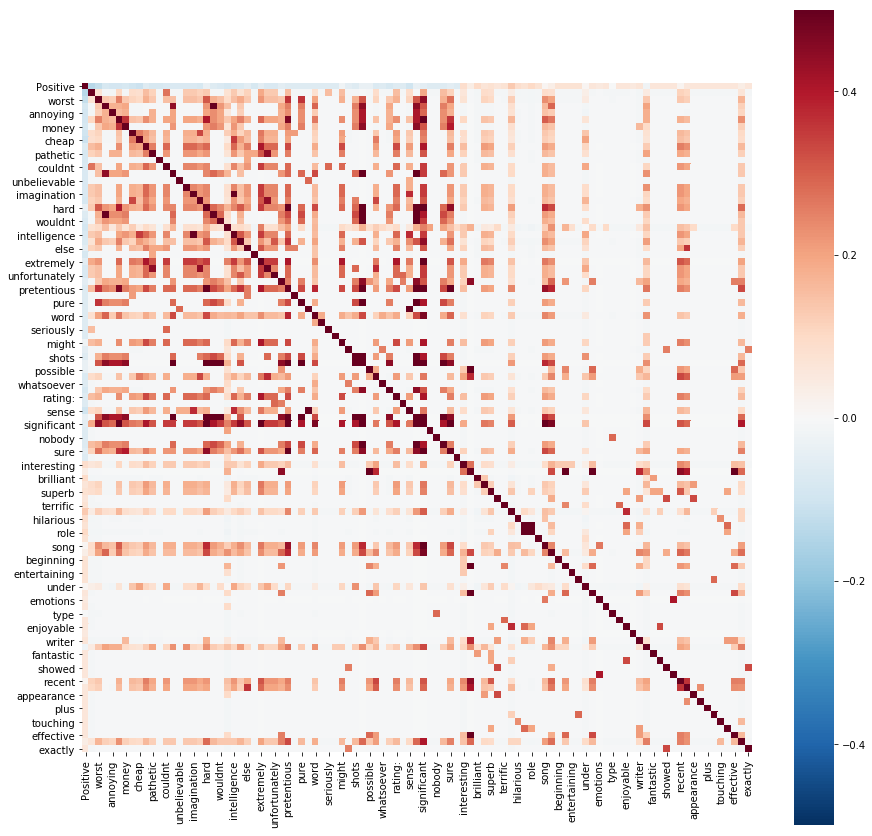

In [21]:
plt.rcParams['figure.figsize'] = 15, 15

sns.heatmap(imdb.corr(), vmin=-.5, vmax=.5, square=True, cmap='RdBu_r')

plt.show()

In [22]:
data = imdb[keywords]
target = imdb['Positive']

In [23]:
from sklearn.naive_bayes import BernoulliNB

bnb = BernoulliNB()

bnb.fit(data, target)
y_pred = bnb.predict(data)
print("Number of mislabeled points out of a total {} points : {}".format(
    data.shape[0],
    (target != y_pred).sum()
))

imdb['prediction'] = y_pred

Number of mislabeled points out of a total 748 points : 216


In [24]:
bnb.score(data, target)

0.71122994652406413

## Confusion Matrix

In [25]:
confusion_matrix(target, y_pred)

array([[156, 206],
       [ 10, 376]])

### "Bad" words with count >= 3 (with spaces between words):

127 True Negatives

235 False Positives

0 False Negatives

386 True Positives

### "Good" words with count >= 3 (with spaces between words):

362 True Negatives

0 False Positives

271 False Negatives

115 True Positives

### "Bad" and "Good" together (with spaces between words) same as "Bad"

### "Bad" words with count >= 3 (no spaces):

155 True Negatives

207 False Positives

17 False Negatives

369 True Positives

### "Good" words with count >= 3 (no spaces):

355 True Negatives

7 False Positives

258 False Negatives

128 True Positives

### "Bad" and "Good" together (no spaces):

156 True Negatives

206 False Positives

10 False Negatives

376 True Positives



## Word Clouds

### Word Cloud for True Positives:

376


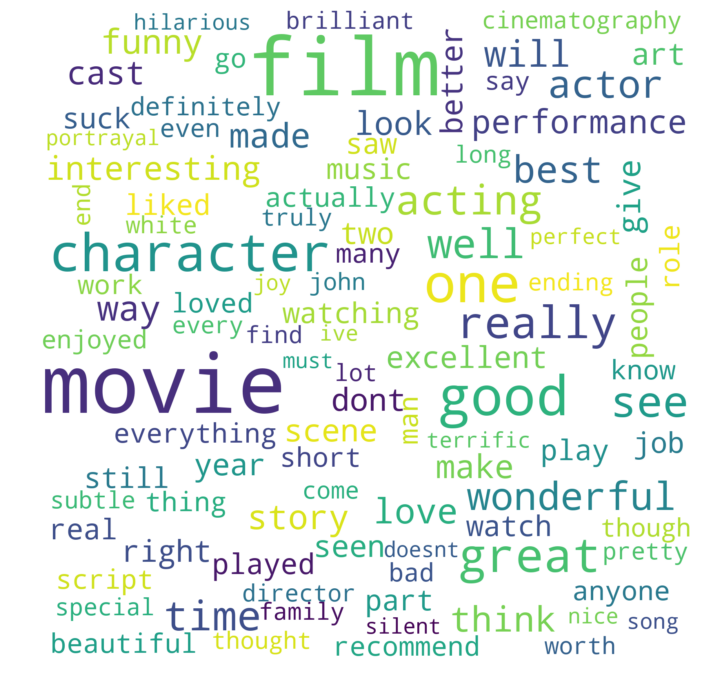

In [26]:
text1 = ''.join(review for review in imdb[(imdb['Positive'] == 1) & (imdb['prediction'] == 1)].Review)

print(len(imdb[(imdb['Positive'] == 1) & (imdb['prediction'] == 1)]))

plt.rcParams['figure.figsize'] = 12, 12

wordcloud = WordCloud(width=1600, height=1600, max_font_size=200, max_words=100, background_color='white').generate(text1)

plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

### Word Cloud for False Positives:

206


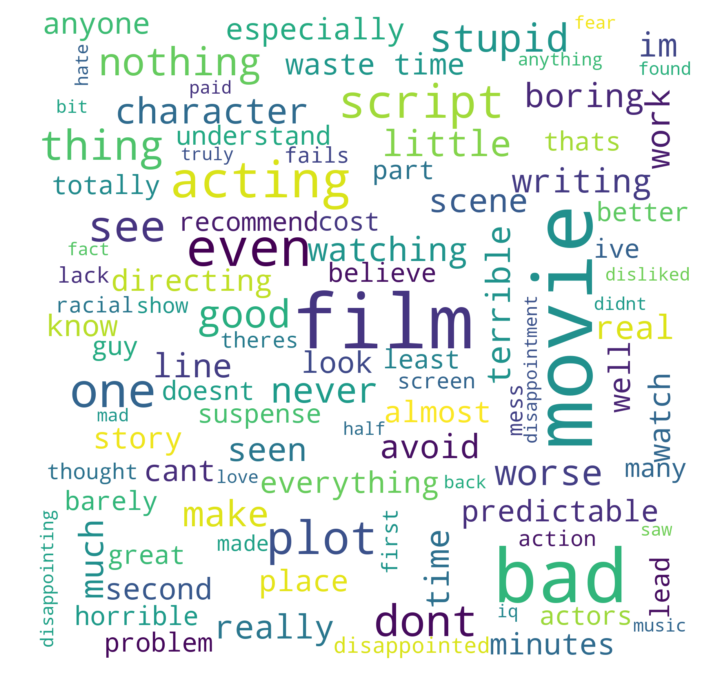

In [27]:
text1 = ''.join(review for review in imdb[(imdb['Positive'] == 0) & (imdb['prediction'] == 1)].Review)

print(len(imdb[(imdb['Positive'] == 0) & (imdb['prediction'] == 1)]))

plt.rcParams['figure.figsize'] = 12, 12

wordcloud = WordCloud(width=1600, height=1600, max_font_size=200, max_words=100, background_color='white').generate(text1)

plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

### Word Cloud for True Negatives:

376


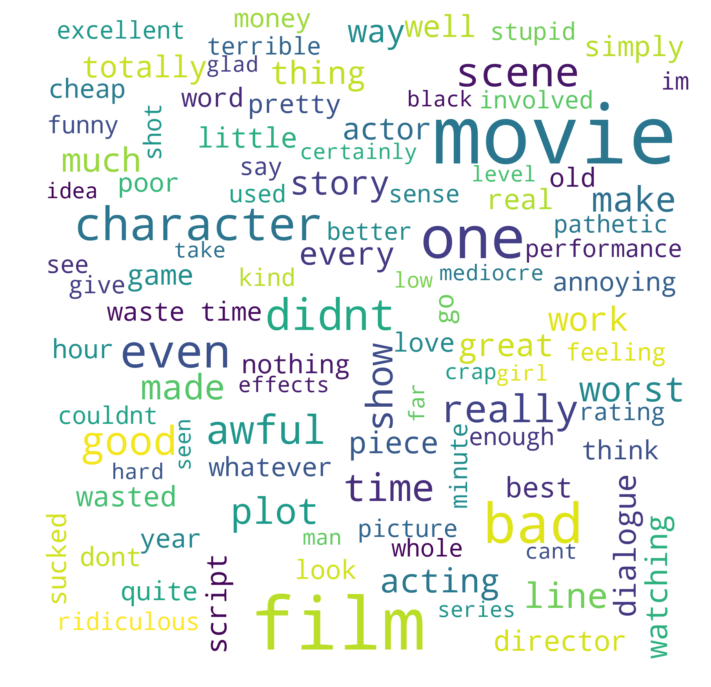

In [28]:
text1 = ''.join(review for review in imdb[(imdb['Positive'] == 0) & (imdb['prediction'] == 0)].Review)

print(len(imdb[(imdb['Positive'] == 1) & (imdb['prediction'] == 1)]))

plt.rcParams['figure.figsize'] = 12, 12

wordcloud = WordCloud(width=1600, height=1600, max_font_size=200, max_words=100, background_color='white').generate(text1)

plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

### Word Cloud for False Negatives:

376


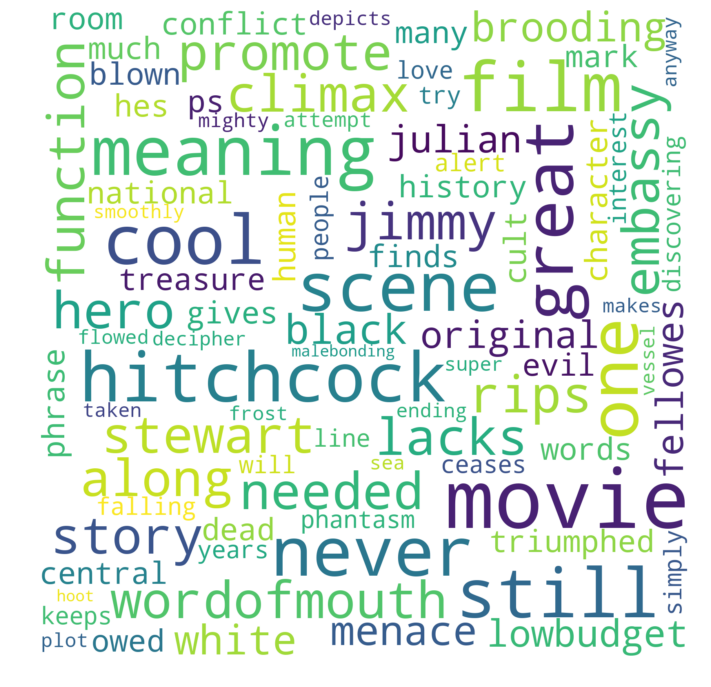

In [29]:
text1 = ''.join(review for review in imdb[(imdb['Positive'] == 1) & (imdb['prediction'] == 0)].Review)

print(len(imdb[(imdb['Positive'] == 1) & (imdb['prediction'] == 1)]))

# No words to make a cloud out of.

plt.rcParams['figure.figsize'] = 12, 12

wordcloud = WordCloud(width=1600, height=1600, max_font_size=200, max_words=100, background_color='white').generate(text1)

plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

# Conclusion

In both datasets, bad review shared more words in common than good reviews.